<a href="https://colab.research.google.com/github/belogabriel/linear_regression/blob/main/regressao_linear_case3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install plotly
%pip install cufflinks
%pip install chart-studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.4 MB/s eta 0:00:00


In [18]:
import pandas as pd
import chart_studio.plotly as py
import cufflinks as cf
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
data_houses = pd.read_csv('/content/USA_Housing.csv', sep=',')
data_houses.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
fig = px.box(data_houses, x="Avg. Area Income")
fig.update_traces(line_color="green")

In [5]:
data_houses.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [6]:
data_houses = data_houses.rename(columns={'Avg. Area Income':'Avg_Area_Income' ,
                                          'Avg. Area House Age':'Avg_Area_House_Age',
                                          'Avg. Area Number of Rooms':'Avg_Area_Number_of_Rooms',
                                          'Avg. Area Number of Bedrooms':'Avg_Area_Number_of_Bedrooms',
                                          'Area Population':'Area_Population'})
data_houses.drop(['Address'], axis=1, inplace=True)
data_houses.describe()

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


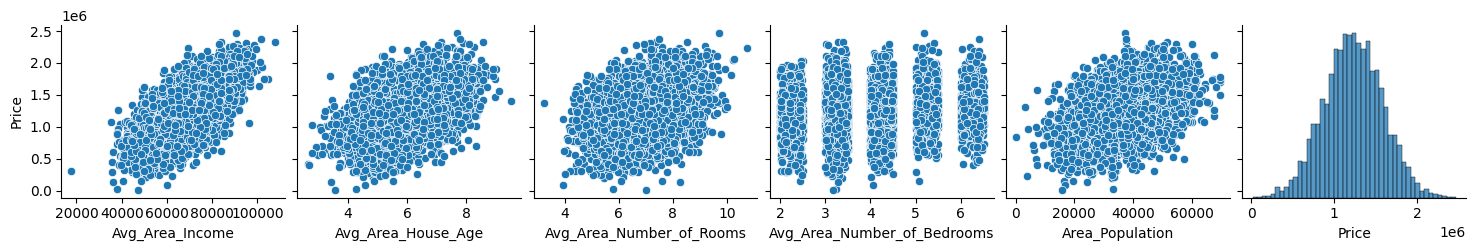

In [10]:
sns.pairplot(data_houses, y_vars='Price');

In [11]:
data_houses.corr()

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price
Avg_Area_Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg_Area_House_Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg_Area_Number_of_Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg_Area_Number_of_Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area_Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


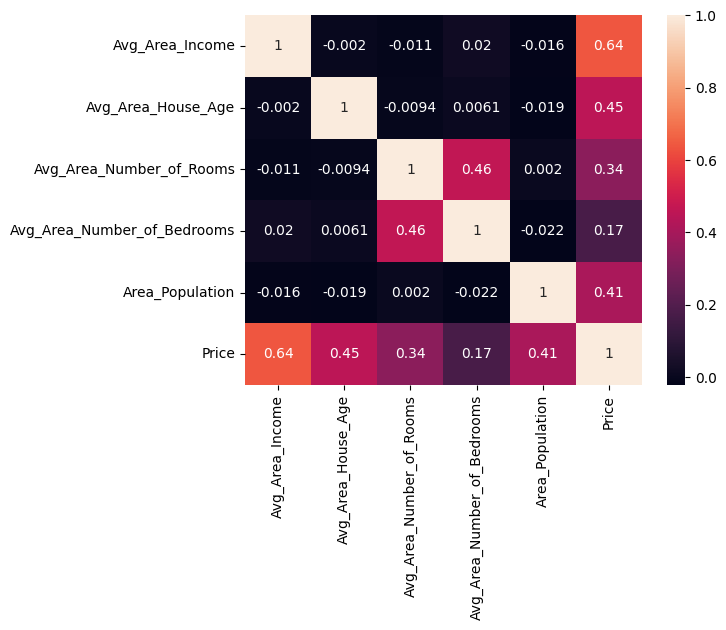

In [13]:
sns.heatmap(data_houses.corr(), annot=True); #pode-se análisar a correlação das variaveis de forma visual, facilitando a análise.

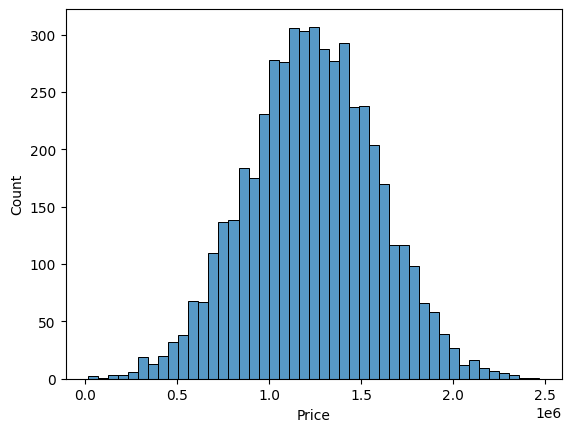

In [14]:
sns.histplot(data_houses["Price"]); #pode-se perceber pelo comportamento do gráfico que possuimos uma distribuição normal.

In [19]:
# separação de variaveis x e y
data_houses.columns
X = data_houses[['Avg_Area_Income', 'Avg_Area_House_Age', 'Avg_Area_Number_of_Rooms',
       'Avg_Area_Number_of_Bedrooms', 'Area_Population']]
Y = data_houses[['Price']]


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=420)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(3500, 5)
(1500, 5)
(3500, 1)
(1500, 1)


In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr = LinearRegression()

In [27]:
lr.fit(X_train,Y_train)

LinearRegression()

In [28]:
y_pred = lr.predict(X_test)

In [31]:
from sklearn.metrics import r2_score
r = r2_score(Y_test, y_pred)

In [32]:
print("r² = ",r)

r² =  0.9175458446664136


In [33]:
import matplotlib.pyplot as plt

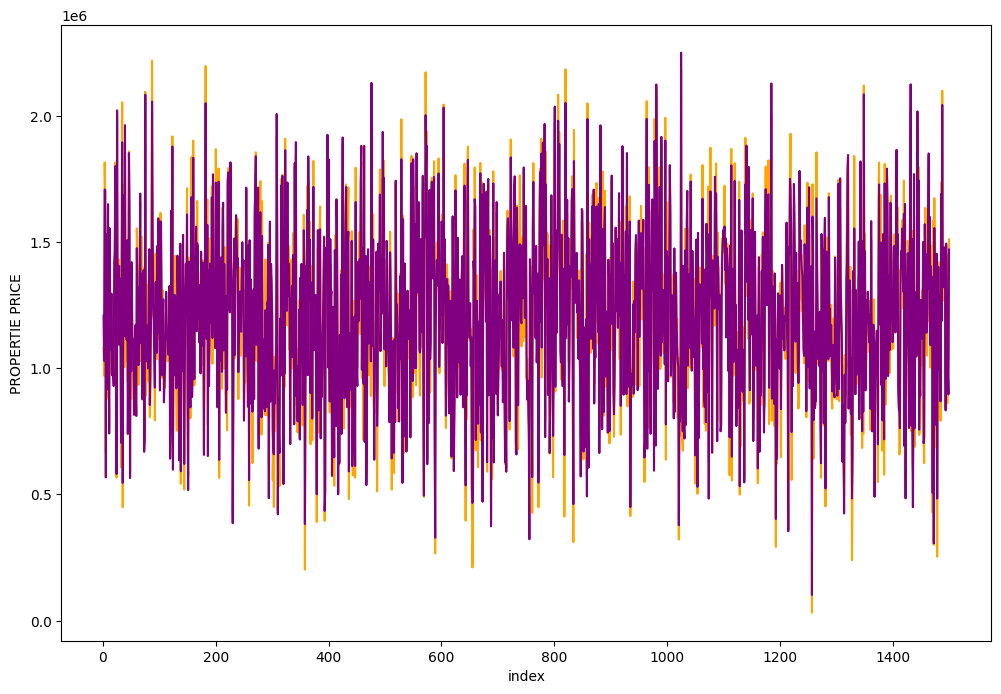

In [38]:
it = [i for i in range(1, 1501, 1)]
fig = plt.figure(figsize=(12,8))
plt.plot(it, Y_test, color ='orange')
plt.plot(it, y_pred, color = 'purple')
plt.xlabel("index");
plt.ylabel("PROPERTIE PRICE");

In [41]:
# EXEMPLO DE PREMISSA DE NEGÓCIO:
Avg_Area_Income = 50
Avg_Area_House_Age = 30
Avg_Area_Number_of_Rooms = 7
Avg_Area_Number_of_Bedrooms = 5
Area_Population = 200
entry = [[Avg_Area_Income, Avg_Area_House_Age, Avg_Area_Number_of_Rooms, Avg_Area_Number_of_Bedrooms, Area_Population]]
lr.predict(entry)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([3202165.29380017])